In [1]:
import numpy as np
import matplotlib.pyplot as plt

#定义 Sigmoid 变换函数
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

#BP算法中的前向计算过程
def forward_NN(x,w,b):
    #隐藏层输出
    h1 = sigmoid(w[0] * x[0] + w[1] * x[1] + b[0])
    h2 = sigmoid(w[2] * x[0] + w[3] * x[1] + b[0])
    h3 = sigmoid(w[4] * x[0] + w[5] * x[1] + b[0])
    #print(h1,h2,h3) 查看中间值
    #最终输出
    o1 = sigmoid(w[6] * h1 + w[8] * h2 + w[10] * h3 + b[1])
    o2 = sigmoid(w[7] * h1 + w[9] * h2 + w[11] * h3 + b[1])
    return h1,h2,h3,o1,o2

#反向传递
def fit(o1,o2,y,x,w,lrate,epochs):
    #循环迭代，调整参数 w
    for i in range(epochs):
        p1 = lrate * (o1 - y[0]) * o1 * (1-o1)
        p2 = lrate * (o2 - y[1]) * o1 * (1-o2)
        #w11到 w16
        w[0] = w[0] - (p1 * w[6] + p2 * w[7]) * h1 * (1-h1) * x[0]
        w[1] = w[1] - (p1 * w[6] + p2 * w[7]) * h1 * (1-h1) * x[1]
        w[2] = w[2] - (p1 * w[8] + p2 * w[9]) * h2 * (1-h2) * x[0]
        w[3] = w[3] - (p1 * w[8] + p2 * w[9]) * h2 * (1-h2) * x[1]
        w[4] = w[4] - (p1 * w[10] + p2 * w[11]) * h3 * (1-h3) * x[0]
        w[5] = w[5] - (p1 * w[10] + p2 * w[11]) * h3 * (1-h3) * x[1]
        
        #w21到 w26
        w[6] = w[6] - p1 * h1
        w[7] = w[7] - p2 * h1
        w[8] = w[8] - p1 * h2
        w[9] = w[9] - p2 * h2
        w[10] = w[10] - p1 * h3
        w[11] = w[11] - p2 * h3
    return w

In [2]:
print('step1: Initialization parameters')
x = [3, 6]
y = [0, 1]
w = [0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22]
b = [0.3, 0.6]
lrate = 0.3

step1: Initialization parameters


In [3]:
print('step2: fit...')
print('step3: predict...')
print(' true value: ', y)
sumDS = []
for epochs in range(0,51,5):
    h1, h2, h3, o1, o2 = forward_NN(x, w, b)
    #step2:fit
    w = fit(o1, o2, y, x, w, lrate, epochs)
    #step3:predict
    h1, h2, h3, o1, o2 = forward_NN(x, w, b)
    print(' iteration', epochs, 'times output is:', o1, o2)
    sumDS.append((o1 - y[0]) + (o2 - y[1]))

step2: fit...
step3: predict...
 true value:  [0, 1]
 iteration 0 times output is: 0.7444102846297973 0.7490681498889493
 iteration 5 times output is: 0.6544562692229909 0.7735741232569598
 iteration 10 times output is: 0.41998425353003865 0.8189183390195498
 iteration 15 times output is: 0.1701425357877755 0.850850435492331
 iteration 20 times output is: 0.11884594177232603 0.8596682734785118
 iteration 25 times output is: 0.09304890491603438 0.8660523028979213
 iteration 30 times output is: 0.07691540640237138 0.8712703653861585
 iteration 35 times output is: 0.06572416516971606 0.8757463177140683
 iteration 40 times output is: 0.05745509915213092 0.8796878526848574
 iteration 45 times output is: 0.05107481479820618 0.8832173304547477
 iteration 50 times output is: 0.04599260431345656 0.8864152071667813


step4:Plot...


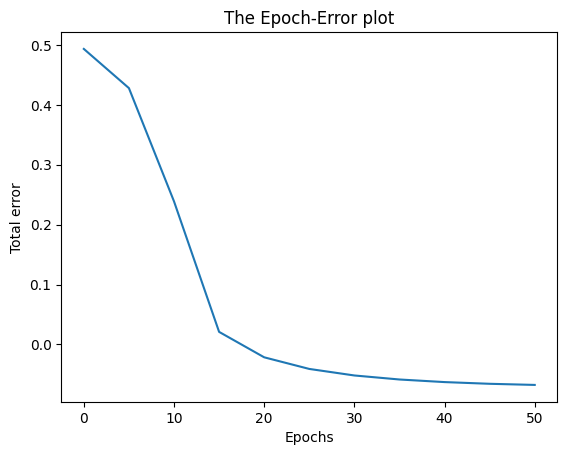

In [4]:
print('step4:Plot...')
plt.plot(range(0, 51, 5), sumDS)
plt.title('The Epoch-Error plot')
plt.xlabel('Epochs')
plt.ylabel('Total error')
plt.show()